# Taller 2 - Jaris Aizprúa Barrios

## Carga de librerías

In [9]:
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Carga y análisis de los datos

In [2]:
# Cargar el dataset
file_path = r"C:\Users\Jaris Aizprua\OneDrive\Maestría UTPL\5 - Métodos de Aprendizaje de Máquina\Taller 2 - Aplicación de algoritmos supervisados\dataTrigo.csv"
data_trigo = pd.read_csv(file_path, delimiter=';')

In [3]:
# Resumen breve del dataset
skim(data_trigo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 210    │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ A                │    0 │      0 │     15 │      2.9 │     11 │     12 │     14 │     17 │    21 │ ▇▇▆▃▅▂  │  │
│ │ P                │    1 │   0.48 │     15 │      1.3 │     12 │     13 │     14 │     16 │    17 │ ▅▇▅▃▅▃  │  │
│ │ C                │    0 │      0 │   0.87 │    0.024 │   0.81 │   0.86 │   0.87 │   0.89 │  0.92 │ ▂▂▅▇▇▂  │  │
│ │ LK               │    0 │      0 │    5.6 │     0.59 │      0 │    5.3 │    5.5 │      6 │   6.7 │     ▇▇  │  │
│ │ WK               │    0 │      0 │    3.3 │     0.38 │    2.6 │    2.9 │    3.2 │    3.6 │     4 │ ▇▇▇▇▆▃  │  │
│ │ A_Coef           │    0 │      0 │    3.7 │      1.5 │   0.77 │    2.6 │    3.6 │    4.8 │   8.5 │  ▃▇▇▆▂  │  │
│ │ LKG              │    0 │      0 │    5.4 │     0.49 │    4.5 │      5 │    5.2 │    5.9 │   6.5 │ ▂▇▅▁▅▂  │  │
│ │ target           │    0 │      0 │      2 │     0.82 │      1 │      1 │      2 │      3 │     3 │ ▇  ▇ ▇  │  │
│ └──────────────────┴──────┴────────┴────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data_trigo.head())

# Resumen estadístico del dataset
print("\nResumen estadístico:")
print(data_trigo.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(data_trigo.isnull().sum())

# Eliminar filas con valores nulos
data_trigo = data_trigo.dropna()

# Verificar valores nulos después de la limpieza
print("\nValores nulos por columna después de la limpieza:")
print(data_trigo.isnull().sum())

Primeras filas del dataset:
       A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       1
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       1
2  14.29    NaN  0.9050  5.291  3.337   2.699  4.825       1
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       1
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       1

Resumen estadístico:
                A           P           C          LK          WK      A_Coef  \
count  210.000000  209.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.561531    0.870999    5.602724    3.258605    3.700201   
std      2.909699    1.308688    0.023629    0.589074    0.377714    1.503557   
min     10.590000   12.410000    0.808100    0.000000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.253000    2.944000    2.561500   
50%     14.355000   14.350000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000

In [5]:
# Resumen breve del dataset, se verifica que ya no existen valores nulos
skim(data_trigo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 209    │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ A                │    0 │      0 │     15 │      2.9 │     11 │     12 │     14 │     17 │    21 │ ▇▇▅▃▅▂  │  │
│ │ P                │    0 │      0 │     15 │      1.3 │     12 │     13 │     14 │     16 │    17 │ ▅▇▅▃▅▃  │  │
│ │ C                │    0 │      0 │   0.87 │    0.024 │   0.81 │   0.86 │   0.87 │   0.89 │  0.92 │ ▂▂▅▇▇▂  │  │
│ │ LK               │    0 │      0 │    5.6 │     0.59 │      0 │    5.2 │    5.5 │      6 │   6.7 │     ▇▇  │  │
│ │ WK               │    0 │      0 │    3.3 │     0.38 │    2.6 │    2.9 │    3.2 │    3.6 │     4 │ ▇▇▇▇▆▃  │  │
│ │ A_Coef           │    0 │      0 │    3.7 │      1.5 │   0.77 │    2.6 │    3.6 │    4.8 │   8.5 │  ▃▇▇▆▂  │  │
│ │ LKG              │    0 │      0 │    5.4 │     0.49 │    4.5 │      5 │    5.2 │    5.9 │   6.5 │ ▂▇▅▁▅▂  │  │
│ │ target           │    0 │      0 │      2 │     0.82 │      1 │      1 │      2 │      3 │     3 │ ▇  ▇ ▇  │  │
│ └──────────────────┴──────┴────────┴────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Selección de características, escalado y división del dataset en training y test

In [6]:
# Separar características y target
X = data_trigo.drop('target', axis=1)
y = data_trigo['target']

In [7]:
# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Función para entrenar el modelo, predecir y obtener las métricas

In [12]:
# Función para entrenar el modelo, predecir y obtener las métricas
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    
    return conf_matrix, accuracy, precision, recall, f1, report

# Diccionario para almacenar las métricas de cada modelo
metrics = {}

## 1) Aplicación del algoritmo árbol de decisión

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_conf_matrix, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_report = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
metrics['Árbol de Decisión'] = [dt_accuracy, dt_precision, dt_recall, dt_f1]

## 2) Aplicación del algoritmo Naive Bayes

In [14]:
nb_model = GaussianNB()
nb_conf_matrix, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_report = evaluate_model(nb_model, X_train, X_test, y_train, y_test)
metrics['Naive Bayes'] = [nb_accuracy, nb_precision, nb_recall, nb_f1]

## 3) Aplicación del algoritmo KNN

In [15]:
knn_model = KNeighborsClassifier()
knn_conf_matrix, knn_accuracy, knn_precision, knn_recall, knn_f1, knn_report = evaluate_model(knn_model, X_train, X_test, y_train, y_test)
metrics['KNN'] = [knn_accuracy, knn_precision, knn_recall, knn_f1]

## 4) Aplicación del algoritmo SVM

In [16]:
svm_model = SVC(random_state=42)
svm_conf_matrix, svm_accuracy, svm_precision, svm_recall, svm_f1, svm_report = evaluate_model(svm_model, X_train, X_test, y_train, y_test)
metrics['SVM'] = [svm_accuracy, svm_precision, svm_recall, svm_f1]

## Matriz de confusión para cada modelo

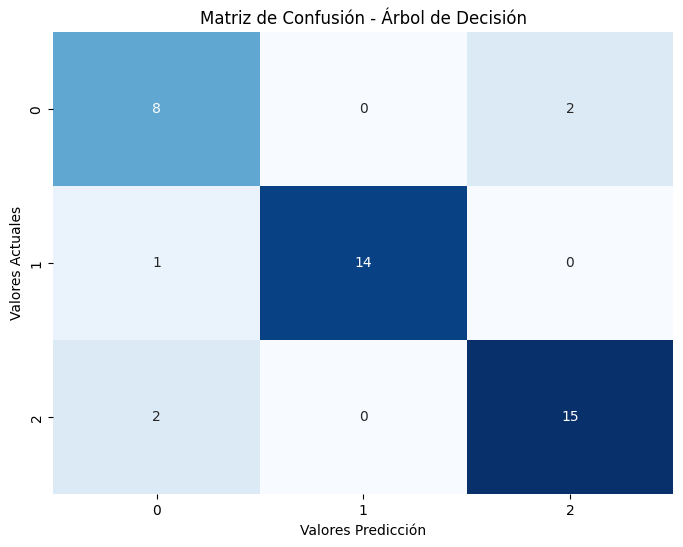

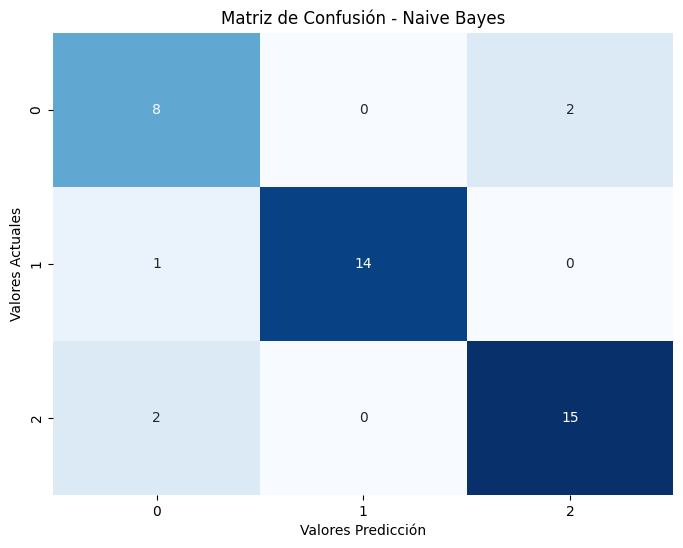

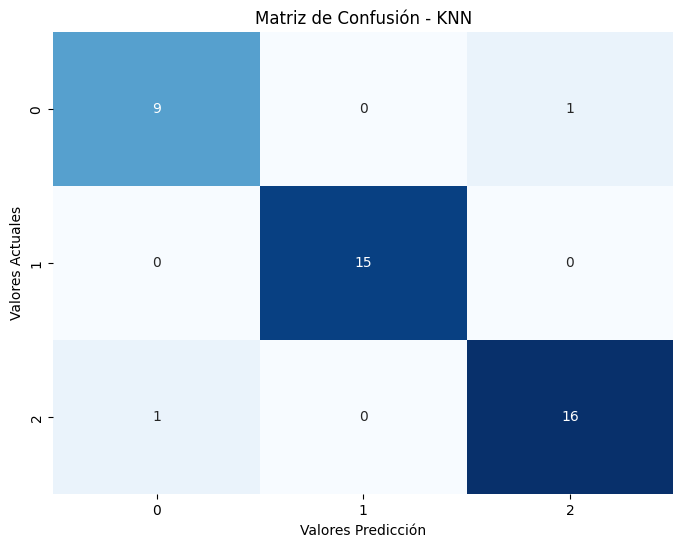

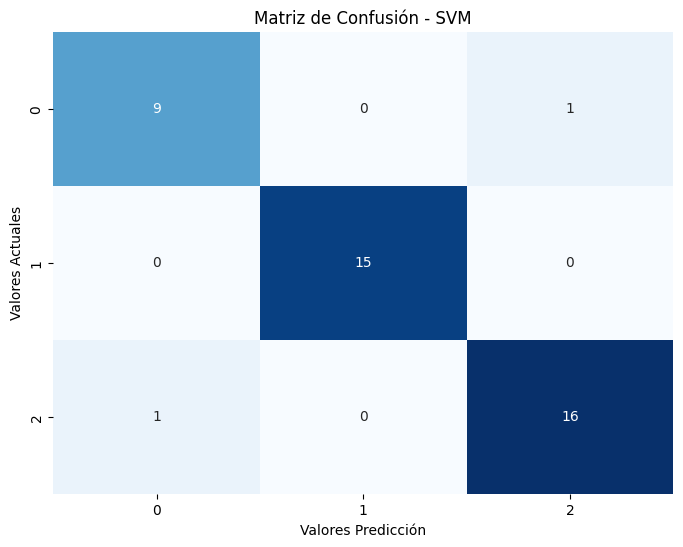

In [17]:
# Matriz de confusión para cada modelo
models_conf_matrix = {
    "Árbol de Decisión": dt_conf_matrix,
    "Naive Bayes": nb_conf_matrix,
    "KNN": knn_conf_matrix,
    "SVM": svm_conf_matrix
}

# Función para graficar la matriz de confusión
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Valores Predicción')
    plt.ylabel('Valores Actuales')
    plt.show()

# Graficar la matriz de confusión para cada modelo
for model_name, conf_matrix in models_conf_matrix.items():
    plot_confusion_matrix(conf_matrix, model_name)

## Análisis de matriz de confusión

* Árbol de decisión:

    * Comete errores en la clase 0 y la clase 2, clasificándolas incorrectamente como clase 2 y clase 0 respectivamente.

* Naive Bayes:

    * Presenta errores en las mismas clases del modelo anterior y con la misma cantidad, sugiriendo que las características del dataset pueden estar influyendo en el desempeño similar de ambos modelos.

* KNN:

    * Presenta un excelente desempeño, especialmente en la clasificación de clase 1.
    * Solo presenta 2 errores en la clase 0 y 2, clasificando incorrectamente como clase 2 y 0 respectivamente.

* SVM:

    * El modelo SVM tiene un desempeño casi perfecto, similar al modelo KNN.
    * Solo presenta 2 errores en la clase 0 y 2, clasificando incorrectamente como clase 2 y 0 respectivamente.

* Conclusiones:

    * Los modelos KNN y SVM son más adecuados para este conjunto de datos, ya que tienen una mejor precisión y menos errores de clasificación en comparación con los modelos de árbol de decisión y Naive Bayes.
    * Sería beneficioso realizar una optimización adicional de hiperparámetros y posiblemente una validación cruzada para asegurar que estos modelos mantengan su rendimiento en diferentes particiones del conjunto de datos.

## Resumen de métricas

In [18]:
# Almacenar las métricas de cada modelo en un dataframe de Pandas
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(metrics_df)

                   Accuracy  Precision    Recall  F1-Score
Árbol de Decisión  0.880952   0.887446  0.880952  0.883376
Naive Bayes        0.880952   0.887446  0.880952  0.883376
KNN                0.952381   0.952381  0.952381  0.952381
SVM                0.952381   0.952381  0.952381  0.952381


## Análisis de métricas

* Árbol de decisión y Naive Bayes:

    * Ambos algoritmos presentan una precisión y un F1-Score de aproximadamente 0.88.
    * Tienen un rendimiento muy similar, lo que indica que son igualmente efectivos para este dataset.

* KNN y SVM:

    * Ambos algoritmos muestran una precisión y un F1-Score de aproximadamente 0.95.
    * Este resultado sugiere que estos modelos son más precisos y efectivos en la clasificación de los datos en comparación con los otros dos modelos.

* Comparación general:

    * KNN y SVM superan al árbol de decisión y Naive Bayes en términos de todas las métricas evaluadas lo cual puede indicar que los datos tienen patrones complejos que los modelos KNN y SVM pueden capturar mejor.

# Búsqueda de hiperparámetros mediante GridSearchCV

In [19]:
# Función para realizar GridSearchCV y evaluar el modelo
def grid_search_evaluate(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    return evaluate_model(best_model, X_train, X_test, y_train, y_test)

# Diccionario para almacenar las métricas de cada modelo
metrics_gridsearchcv = {}

# 1) Árbol de decisión con GridSearchCV

In [21]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt_model = DecisionTreeClassifier(random_state=42)
dt_conf_matrix, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_report = grid_search_evaluate(dt_model, dt_param_grid, X_train, X_test, y_train, y_test)
metrics_gridsearchcv['Árbol de decisión'] = [dt_accuracy, dt_precision, dt_recall, dt_f1]

# 2) KNN con GridSearchCV

In [22]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model = KNeighborsClassifier()
knn_conf_matrix, knn_accuracy, knn_precision, knn_recall, knn_f1, knn_report = grid_search_evaluate(knn_model, knn_param_grid, X_train, X_test, y_train, y_test)
metrics_gridsearchcv['KNN'] = [knn_accuracy, knn_precision, knn_recall, knn_f1]

# 3) SVM con GridSearchCV

In [23]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm_model = SVC(random_state=42)
svm_conf_matrix, svm_accuracy, svm_precision, svm_recall, svm_f1, svm_report = grid_search_evaluate(svm_model, svm_param_grid, X_train, X_test, y_train, y_test)
metrics_gridsearchcv['SVM'] = [svm_accuracy, svm_precision, svm_recall, svm_f1]

# Matriz de confusión con GridSearchCV

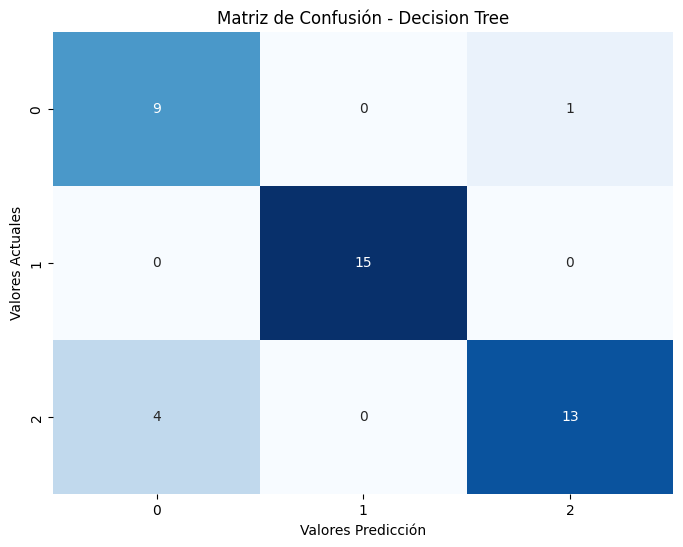

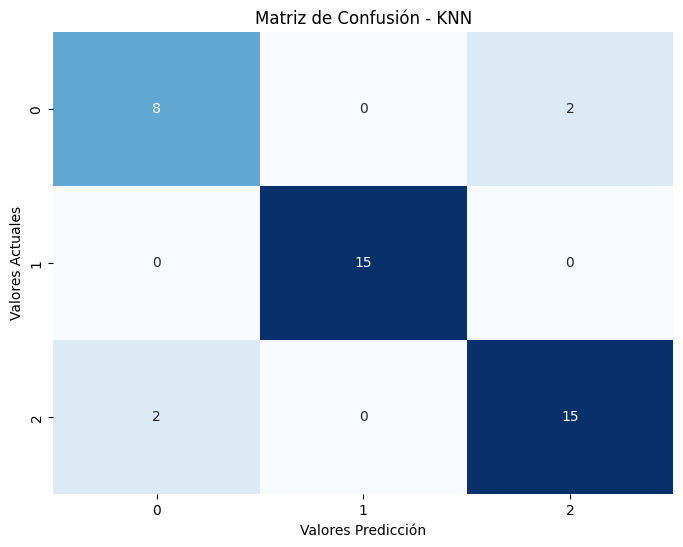

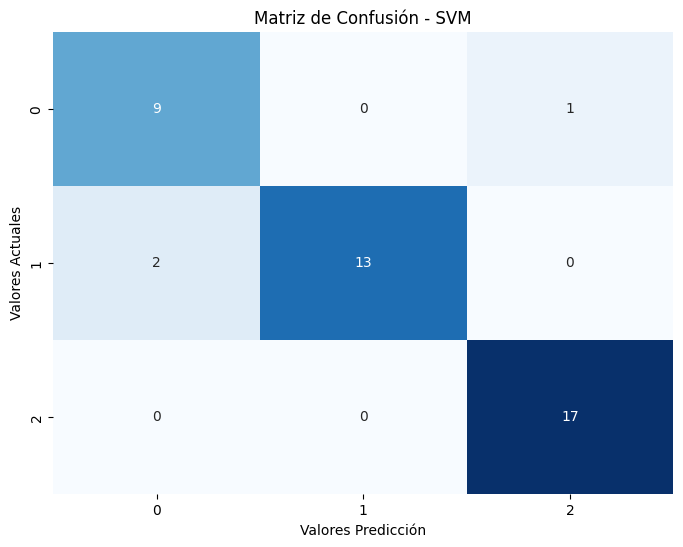

In [28]:
# Matriz de confusión para cada modelo
models_conf_matrix = {
    "Árbol de decisión": dt_conf_matrix,
    "KNN": knn_conf_matrix,
    "SVM": svm_conf_matrix
}

# Graficar la matriz de confusión para cada modelo
for model_name, conf_matrix in models_conf_matrix.items():
    plot_confusion_matrix(conf_matrix, model_name)

# Resumen de métricas con GridSearchCV

In [27]:
# Almacenar las métricas de cada modelo en un dataframe de Pandas
metrics_df_gridsearchcv = pd.DataFrame.from_dict(metrics_gridsearchcv, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(metrics_df_gridsearchcv)

                   Accuracy  Precision    Recall  F1-Score
Árbol de decisión  0.880952   0.897828  0.880952  0.882956
KNN                0.904762   0.904762  0.904762  0.904762
SVM                0.928571   0.934223  0.928571  0.928912


## Análisis de métricas con GridSearchCV

* Árbol de decisión

    * Aunque muestra una precisión y recall buenos, es el modelo con menor rendimiento comparado con KNN y SVM.

* KNN

    * Muestra un equilibrio perfecto entre precisión, recall y F1-Score. Es un modelo robusto y bien ajustado tras la optimización.

* SVM

    * SVM es el modelo con mejor rendimiento general, con las métricas más altas en precisión, recall y F1-Score, lo que indica una excelente capacidad de clasificación.

# Resumen general

* Árbol de decisión muestra una ligera mejora en la precisión con GridSearchCV.

* Naive Bayes no se benefició de GridSearchCV debido a la falta de hiperparámetros ajustables.

* KNN y SVM mostraron un mejor rendimiento sin GridSearchCV, lo que sugiere que los parámetros predeterminados eran adecuados para este conjunto de datos.